<a href="https://colab.research.google.com/github/Dhanessss20/PCVK_Ganjil_2024/blob/main/PCVK_Modul6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Dhaneswara Haryo Satriagung** <br>
**NIM : 2241720037** <br>
**Kelas : TI-3B** <br>

# MODUL 6 – Histogram, Histogram Equalization, Dithering

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.<br><br>

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

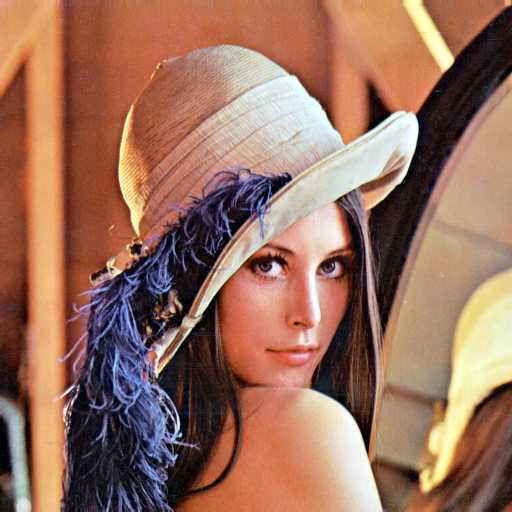

In [ ]:
path = '/content/drive/MyDrive/lena.jpg'
img = cv.imread(path)
cv2_imshow(img)

In [ ]:
channels = cv.split(img)
colors = ('r', 'g', 'b')
channel_names = ['Red', 'Green', 'Blue']

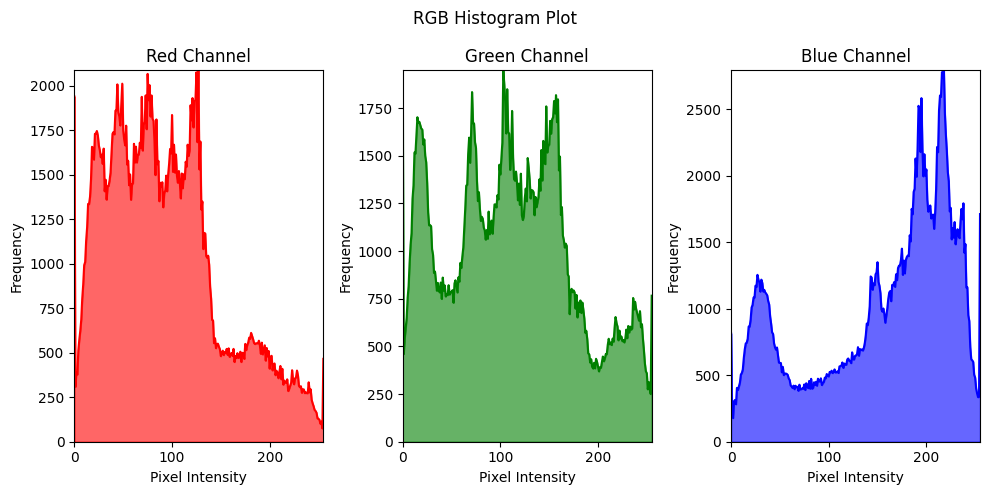

In [ ]:
plt.figure(figsize=(10, 5))
for i, (channel, color) in enumerate(zip(channels, colors)):
    histogram = [0] * 256

    for row in channel:
        for pixel in row:
            histogram[pixel] += 1

    plt.subplot(1, 3, i + 1)
    plt.plot(histogram, color=color)
    plt.fill_between(range(256), histogram, color=color, alpha=0.6)
    plt.title(f'{channel_names[i]} Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])

    plt.ylim([0, max(histogram)])

plt.suptitle('RGB Histogram Plot')
plt.tight_layout()
plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

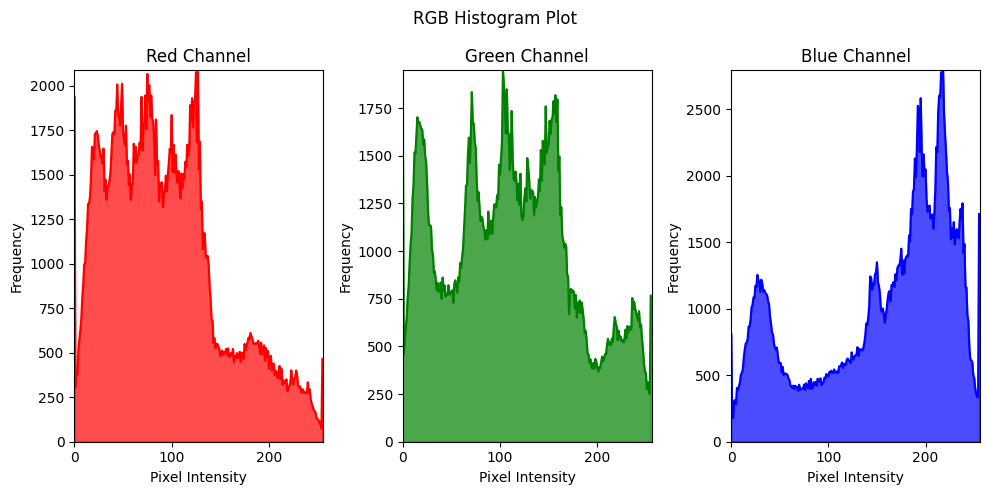

In [ ]:
plt.figure(figsize=(10, 5))
for i, (channel, color) in enumerate(zip(channels, colors)):
    histogram, bin_edges = np.histogram(channel, bins=256, range=(0, 256))

    plt.subplot(1, 3, i + 1)
    plt.plot(bin_edges[0:-1], histogram, color=color)
    plt.fill_between(bin_edges[0:-1], histogram, color=color, alpha=0.7)
    plt.title(f'{channel_names[i]} Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])

    plt.ylim([0, max(histogram)])

plt.suptitle('RGB Histogram Plot')
plt.tight_layout()
plt.show()

Output yang dihasilkan menggunakan library numPy maupun tidak, tidak memiliki perbedaan yang signifikan

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)


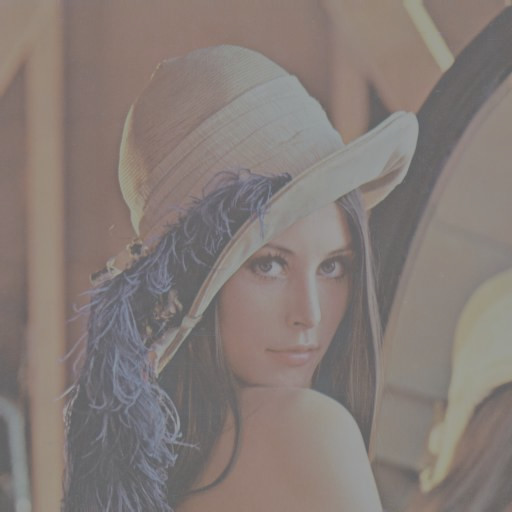

In [ ]:
path = '/content/drive/MyDrive/lena_lc.jpg'
image = cv.imread(path)
cv2_imshow(image)

In [ ]:
colors = ('r', 'g', 'b')
original_histograms = {}
for i, color in enumerate(colors):
    original_histograms[color] = [0] * 256
    for row in image[:,:,i]:
        for pixel in row:
            original_histograms[color][pixel] += 1

yuv_image = cv.cvtColor(image, cv.COLOR_RGB2YUV)
yuv_image[:,:,0] = cv.equalizeHist(yuv_image[:,:,0])  # Equalize the Y (luminance) channel
equalized_image = cv.cvtColor(yuv_image, cv.COLOR_YUV2RGB)

equalized_histograms = {}
for i, color in enumerate(colors):
    equalized_histograms[color] = [0] * 256
    for row in equalized_image[:,:,i]:
        for pixel in row:
            equalized_histograms[color][pixel] += 1

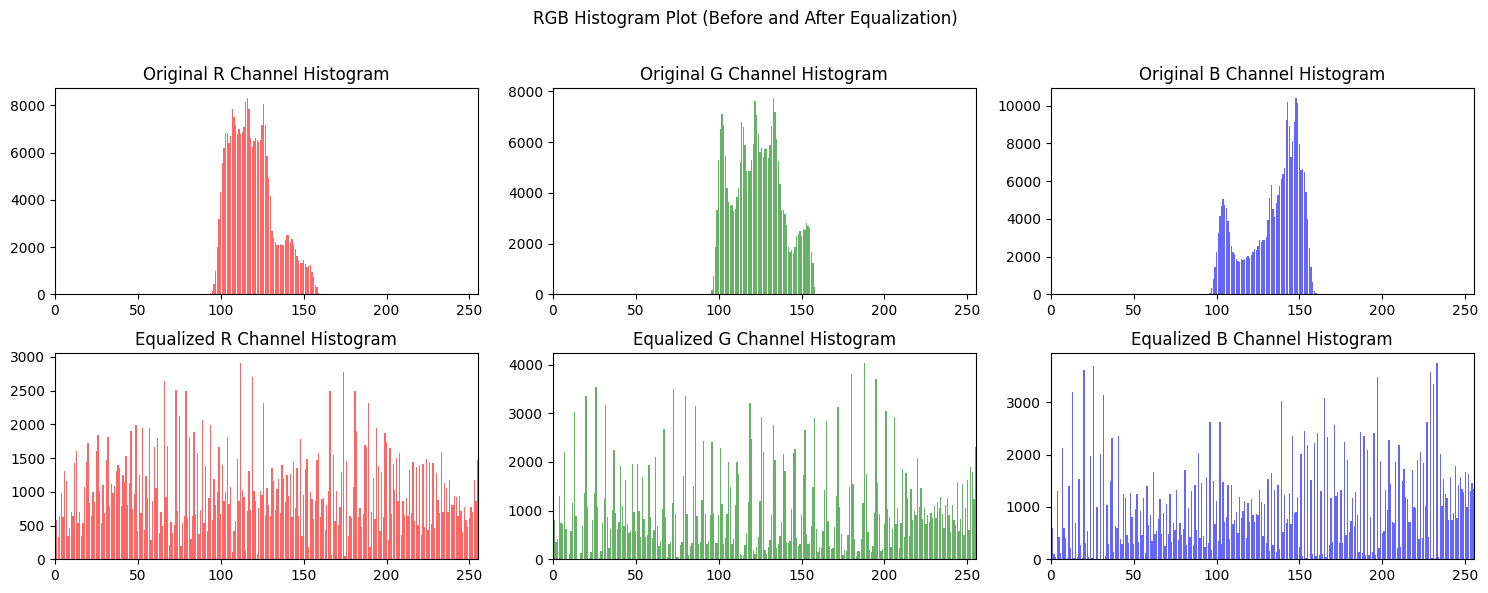

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Display original histograms
for i, color in enumerate(colors):
    axes[0, i].bar(range(256), original_histograms[color], color=color, alpha=0.6)
    axes[0, i].set_xlim([0, 255])
    axes[0, i].set_title(f'Original {color.upper()} Channel Histogram')

# Display equalized histograms
for i, color in enumerate(colors):
    axes[1, i].bar(range(256), equalized_histograms[color], color=color, alpha=0.6)
    axes[1, i].set_xlim([0, 255])
    axes[1, i].set_title(f'Equalized {color.upper()} Channel Histogram')

# Set overall titles and layout
plt.suptitle('RGB Histogram Plot (Before and After Equalization)')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

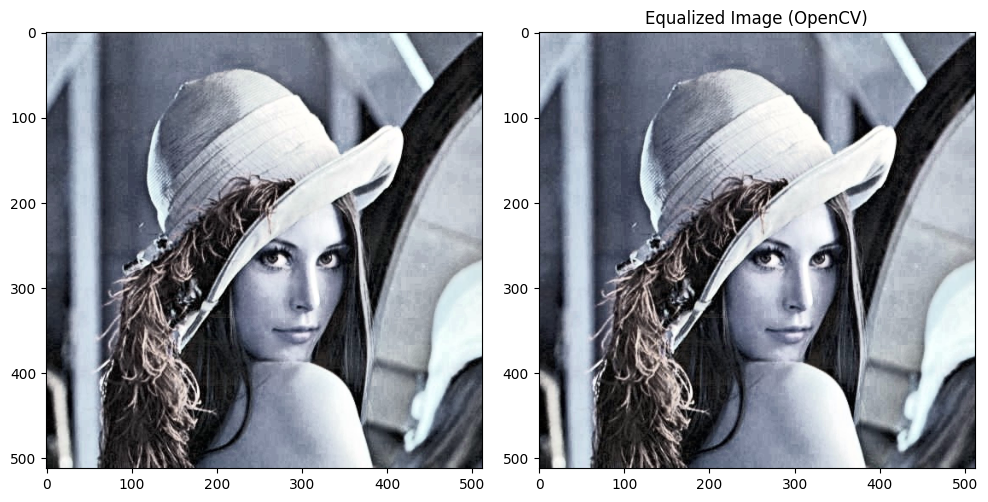

In [ ]:
ycrb_image = cv.cvtColor(image, cv.COLOR_RGB2YCrCb)
y_channel, cr_channel, cb_channel = cv.split(ycrb_image)

equalized_y_channel = cv.equalizeHist(y_channel)

equalized_ycrb_image = cv.merge((equalized_y_channel, cr_channel, cb_channel))

equalized_image_cv2 = cv.cvtColor(equalized_ycrb_image, cv.COLOR_YCrCb2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display original grayscale image
axes[0].imshow(equalized_image, cmap='gray')
axes[0].set_title('')

# Display OpenCV equalized image
axes[1].imshow(equalized_image_cv2, cmap='gray')
axes[1].set_title('Equalized Image (OpenCV)')

plt.tight_layout()
plt.show()

Tidak ada perbedaan yang signifikan

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)


In [ ]:
path = '/content/drive/MyDrive/lena.jpg'
img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [ ]:
def map_color(r, g, b):
    threshold = 128
    r_bit = 1 if r > threshold else 0
    g_bit = 1 if g > threshold else 0
    b_bit = 1 if b > threshold else 0
    color_index = (r_bit << 2) | (g_bit << 1) | b_bit
    color_map = {
        0: (0, 0, 0),      # Black
        1: (0, 0, 255),    # Blue
        2: (0, 255, 0),    # Green
        3: (0, 255, 255),  # Cyan
        4: (255, 0, 0),    # Red
        5: (255, 0, 255),  # Magenta
        6: (255, 255, 0),  # Yellow
        7: (255, 255, 255) # White
    }
    return color_map[color_index]

In [ ]:
def quantize_image(img):
    img_array = np.array(img)
    output_array = np.zeros_like(img_array)
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            r, g, b = img_array[i, j]
            output_array[i, j] = map_color(r, g, b)
    return Image.fromarray(output_array.astype('uint8'), 'RGB')

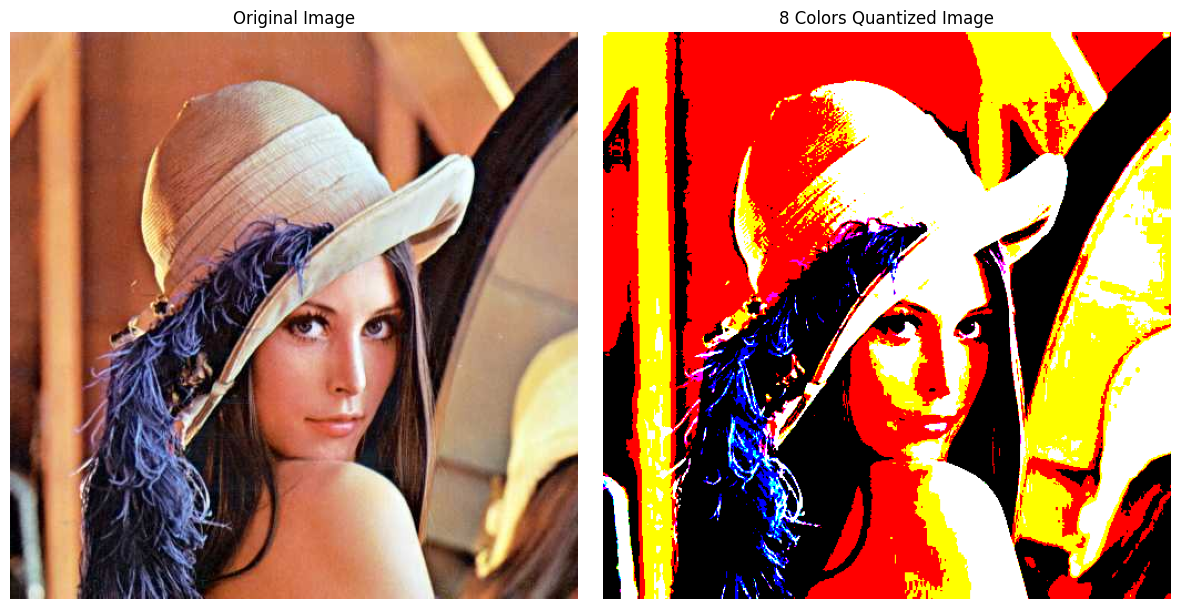

In [ ]:
quantized_image = quantize_image(img)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(quantized_image)
plt.title('8 Colors Quantized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

In [ ]:
def floyd_steinberg_dithering(image):
  pixels = np.array(image, dtype=float)

  for channel in range(3):  # Iterate over Red, Green, Blue channels
      for y in range(pixels.shape[0]):
          for x in range(pixels.shape[1]):
              old_pixel = pixels[y, x, channel]
              new_pixel = 255 if old_pixel > 127 else 0
              pixels[y, x, channel] = new_pixel
              error = old_pixel - new_pixel

              # Distribute the error to neighboring pixels
              if x+1 < pixels.shape[1]:
                  pixels[y, x+1, channel] += error * 7 / 16
              if x-1 >= 0 and y+1 < pixels.shape[0]:
                  pixels[y+1, x-1, channel] += error * 3 / 16
              if y+1 < pixels.shape[0]:
                  pixels[y+1, x, channel] += error * 5 / 16
              if x+1 < pixels.shape[1] and y+1 < pixels.shape[0]:
                  pixels[y+1, x+1, channel] += error * 1 / 16

  return Image.fromarray(np.uint8(pixels))

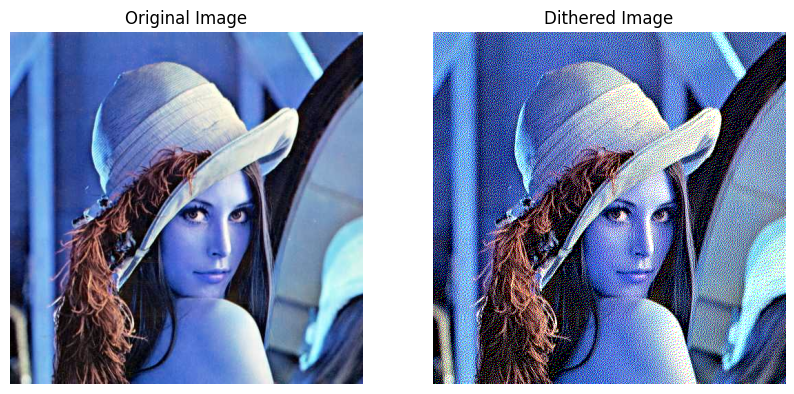

In [ ]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

dithered_img = floyd_steinberg_dithering(img)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(np.array(img))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Dithered Image")
plt.imshow(np.array(dithered_img))
plt.axis('off')

plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!


In [ ]:
def floyd_steinberg_dithering(image):
    h, w = image.shape
    dithered_image = np.zeros((h, w), dtype=np.uint8)

    for y in range(h):
        for x in range(w):
            old_pixel = image[y, x]
            new_pixel = 255 * (old_pixel // 128)  # Thresholding
            dithered_image[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < w:
                image[y, x + 1] += quant_error * 7 / 16
            if x - 1 >= 0 and y + 1 < h:
                image[y + 1, x - 1] += quant_error * 3 / 16
            if y + 1 < h:
                image[y + 1, x] += quant_error * 5 / 16
            if x + 1 < w and y + 1 < h:
                image[y + 1, x + 1] += quant_error * 1 / 16

    return dithered_image

<ipython-input-18-fa215a9cb40f>:53: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 4)


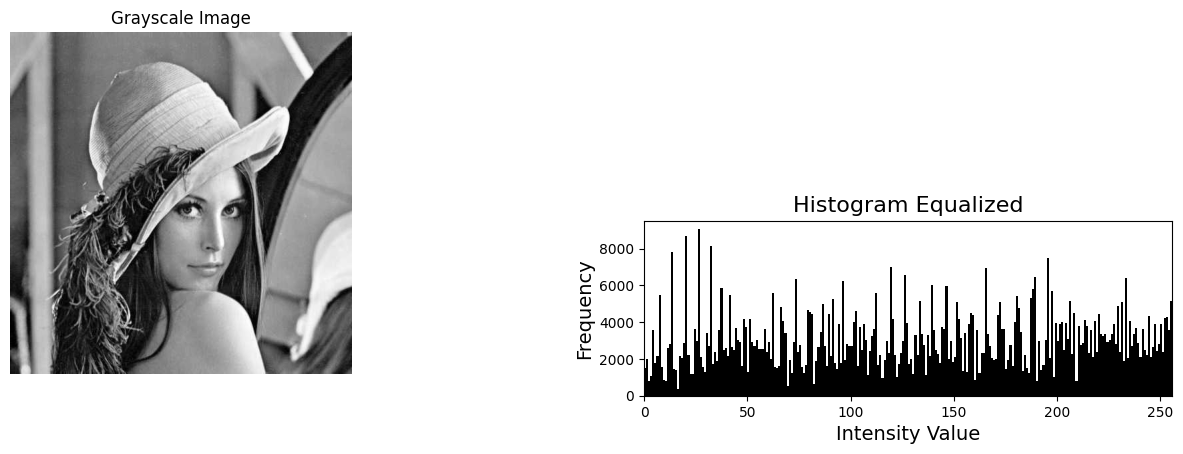

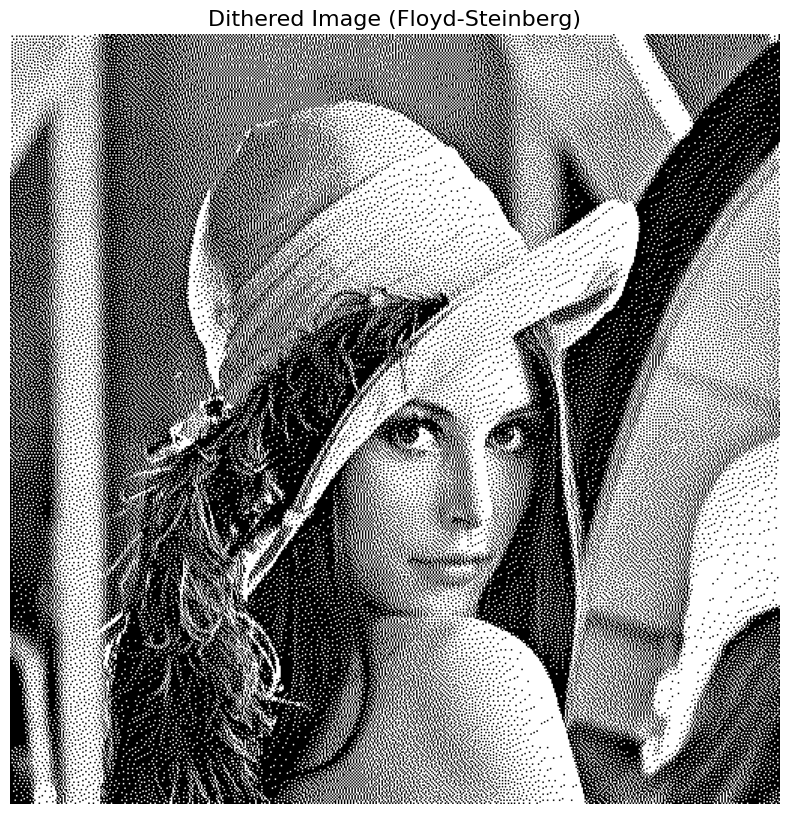

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image

# 1. Convert to grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_pixels = np.array(gray_img)

# 2. Histogram equalization using OpenCV
equalized_img = cv2.equalizeHist(gray_pixels)

# 3. Apply Floyd-Steinberg Dithering
dithered_pixels = np.copy(equalized_img).astype(float)

for y in range(dithered_pixels.shape[0]):
    for x in range(dithered_pixels.shape[1]):
        old_pixel = dithered_pixels[y, x]
        new_pixel = 255 if old_pixel > 127 else 0
        dithered_pixels[y, x] = new_pixel
        error = old_pixel - new_pixel

        # Distribute the error
        if x + 1 < dithered_pixels.shape[1]:
            dithered_pixels[y, x + 1] += error * 7 / 16
        if x - 1 >= 0 and y + 1 < dithered_pixels.shape[0]:
            dithered_pixels[y + 1, x - 1] += error * 3 / 16
        if y + 1 < dithered_pixels.shape[0]:
            dithered_pixels[y + 1, x] += error * 5 / 16
        if x + 1 < dithered_pixels.shape[1] and y + 1 < dithered_pixels.shape[0]:
            dithered_pixels[y + 1, x + 1] += error * 1 / 16

# Convert the dithered pixels array back to an image
dithered_img = Image.fromarray(np.uint8(dithered_pixels))

# Display original, equalized, and dithered images using matplotlib
plt.figure(figsize=(15, 5))

# Original grayscale image
plt.subplot(1, 3, 1)
plt.title("Grayscale Image")
plt.imshow(gray_pixels, cmap='gray')
plt.axis('off')

# Equalized image
plt.subplot(1, 3, 2)
plt.title("Histogram Equalized Image")
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Histogram Equalized", fontsize=16)
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='black')
plt.xlim([0, 256])
plt.xlabel("Intensity Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)


# Gambar Dithered
plt.figure(figsize=(10, 10))
plt.title("Dithered Image (Floyd-Steinberg)", fontsize=16)
plt.imshow(dithered_img, cmap='gray')
plt.axis('off')

plt.show()